In [24]:
import kwant
import numpy as np

from types import SimpleNamespace

import Modules.pauli as pauli
import Modules.TB_parameters as Tpar
import Modules.ribbon_params_11_band as rp
import Modules.Ham_MX2_11_band as Ham

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt

In [26]:
def test_graphene_armchair_ribbon(W=10):
    """MX2 lattice, but graphene parameters. Dispersion of an armchair ribbon of width W"""
    # Define the MX2 lattice.
    # Two atoms (M and X) per unit cell
    MX2 = kwant.lattice.general([(1, 0), (-1/2, np.sqrt(3)/2)],  # Bravais lattice vectors a1 and a2
                                [(0, 0), (1/2, 1/(2*np.sqrt(3)))], # Atom coordinates in a unit cell, M and X
                                norbs=[1, 1])  #norbs=[5, 6]) # Number of orbitals per atom type, M and X 
    M, X = MX2.sublattices
    
    sym_armchair = kwant.TranslationalSymmetry(MX2.vec((1, 2)))
    syst_armchair = kwant.Builder(sym_armchair)

    def armchair_ribbon_shape(pos):
        x, y = pos
        return (0 <= x < W)

    def onsite_M(site):
        return 0

    def onsite_X(site):
        return 0

    syst_armchair[M.shape(armchair_ribbon_shape, (0, 0))] = onsite_M
    syst_armchair[X.shape(armchair_ribbon_shape, (0, 0))] = onsite_X
    
    # Nearest neighbour hoppings
    intra_cell_hoppings = (((0, 0), X, M), )
    syst_armchair[[kwant.builder.HoppingKind(*hop) for hop in intra_cell_hoppings]] = -1

    left_hoppings = (((-1, 0), X, M), )
    syst_armchair[[kwant.builder.HoppingKind(*hop) for hop in left_hoppings]] = -1

    down_hoppings = (((-1, -1), X, M), )
    syst_armchair[[kwant.builder.HoppingKind(*hop) for hop in down_hoppings]] = -1
    
    # Longest range hoppings in the 11 band model
#     long_range_hoppings = (((-2, -1), X, M), ((0, -1), X, M), ((0, 1), X, M))
#     syst_armchair[[kwant.builder.HoppingKind(*hop) for hop in long_range_hoppings]] = -0.5
    
    # Plot M and X atoms differently
    def family_colors(site):
        return 0 if site.family == M else 1

    kwant.plot(syst_armchair, site_color=family_colors, site_lw=0.1, colorbar=False);
    
    fsyst = syst_armchair.finalized()
    bands = kwant.physics.Bands(fsyst)
    momenta = np.linspace(-2*np.pi, 2*np.pi, 101)
    energies = [bands(k) for k in momenta]

    plt.figure()
    plt.plot(momenta, energies)
    plt.xlabel("momentum [(lattice constant)^-1]")
    plt.ylabel("energy [t]")
    plt.show()
    
def test_wraparound():
    """MX2 lattice but with graphene parameters"""
    # Define the MX2 lattice.
    # Two atoms (M and X) per unit cell
    # Assumed spinless for now!
    MX2 = kwant.lattice.general([(1, 0), (-1/2, np.sqrt(3)/2)],  # Bravais lattice vectors a1 and a2
                                [(0, 0), (1/2, 1/(2*np.sqrt(3)))], # Atom coordinates in a unit cell, M and X
                                norbs=[1, 1])  #norbs=[5, 6]) # Number of orbitals per atom type, M and X 
    M, X = MX2.sublattices

    # Obtain the 2D dispersion
    sym_2D = kwant.TranslationalSymmetry(MX2.vec((1, 0)), MX2.vec((0, 1)))

    bulk = kwant.Builder(sym_2D)
    bulk[ [M(0, 0), X(0, 0)] ] = 0  # Onsites!

    intra_cell_hoppings = (((0, 0), X, M), )
    bulk[[kwant.builder.HoppingKind(*hop) for hop in intra_cell_hoppings]] = -1

    left_hoppings = (((-1, 0), X, M), )
    bulk[[kwant.builder.HoppingKind(*hop) for hop in left_hoppings]] = -1

    down_hoppings = (((-1, -1), X, M), )
    bulk[[kwant.builder.HoppingKind(*hop) for hop in down_hoppings]] = -1
    
    # Longest range hoppings in the 11 band model
#     long_range_hoppings = (((-2, -1), X, M), ((0, -1), X, M), ((0, 1), X, M))
#     bulk[[kwant.builder.HoppingKind(*hop) for hop in long_range_hoppings]] = -0.5

    wrapped = kwant.wraparound.wraparound(bulk).finalized()
    kwant.wraparound.plot_2d_bands(wrapped)
    return wrapped

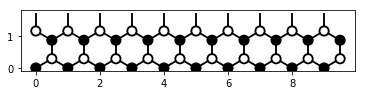

In [27]:
test_graphene_armchair_ribbon(W=10)

/opt/conda/lib/python3.5/site-packages/mpl_toolkits/mplot3d/axes3d.py:1025: UserWarning: Axes3D.figure.canvas is 'None', mouse rotation disabled.  Set canvas then call Axes3D.mouse_init().
  warnings.warn('Axes3D.figure.canvas is \'None\', mouse rotation disabled.  Set canvas then call Axes3D.mouse_init().')


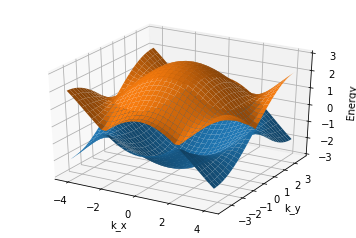

In [5]:
wrapped = test_wraparound()

In [6]:
momentum_names = wrapped._momentum_names
momentum_names

['k_x', 'k_y']

In [7]:
k = [1, 2]
p = dict(zip(momentum_names, k))

#         return syst.hamiltonian_submatrix(params=p, sparse=False)
wrapped.hamiltonian_submatrix(params=p, sparse=False)

array([[ 0.00000000+0.j        , -0.55030981+0.98259099j],
       [-0.55030981-0.98259099j,  0.00000000+0.j        ]])

## Trying lattices and hoppings

In [28]:
# Define the MX2 lattice.
# Two atoms (M and X) per unit cell
# Assumed spinless for now!
MX2 = kwant.lattice.general([(1, 0), (-1/2, np.sqrt(3)/2)],  # Bravais lattice vectors a1 and a2
                            [(0, 0), (1/2, 1/(2*np.sqrt(3)))], # Atom coordinates in a unit cell, M and X
                            norbs=[1, 1])  #norbs=[5, 6]) # Number of orbitals per atom type, M and X 
M, X = MX2.sublattices

In [29]:
X(0,0)

Site(kwant.lattice.Monatomic([[1.0, 0.0], [-0.5, 0.8660254037844386]], [0.5, 0.2886751345948129], '1', 1), array([0, 0]))

In [30]:
MX2.vec((1,2))

array([0.0, 1.7320508075688772])

In [31]:
sym_armchair = kwant.TranslationalSymmetry(MX2.vec((1, 2)))

In [32]:
lead = kwant.Builder(sym_armchair)
syst = kwant.Builder()

In [33]:
W = 10; L = 4
def armchair_ribbon_shape(pos):
    x, y = pos
    return (0 <= x < W)

def square(pos):
    x, y = pos
    return (0 <= x < W) and (0 <= y < L)

def onsite_M(site):
    return 0

def onsite_X(site):
    return 0

lead[M.shape(armchair_ribbon_shape, (0, 0))] = onsite_M
lead[X.shape(armchair_ribbon_shape, (0, 0))] = onsite_X

syst[M.shape(square, (0, 0))] = onsite_M
syst[X.shape(square, (1/2, 1/(2*np.sqrt(3))))] = onsite_X

In [34]:
# Hoppings
# M to X, nearest neighbour
XM_NN_hoppings = (((0, 0), X, M), ((-1, 0), X, M), ((-1, -1), X, M))
syst[[kwant.builder.HoppingKind(*hop) for hop in XM_NN_hoppings]] = -1
lead[[kwant.builder.HoppingKind(*hop) for hop in XM_NN_hoppings]] = -1

# M to M
MM_hoppings = (((1, 1), M, M), ((1, 0), M, M), ((0, -1), M, M))
syst[[kwant.builder.HoppingKind(*hop) for hop in MM_hoppings]] = -1
lead[[kwant.builder.HoppingKind(*hop) for hop in MM_hoppings]] = -1

# X to X
XX_hoppings = (((1, 1), X, X), ((1, 0), X, X), ((0, -1), X, X))
syst[[kwant.builder.HoppingKind(*hop) for hop in XX_hoppings]] = -1
lead[[kwant.builder.HoppingKind(*hop) for hop in XX_hoppings]] = -1

# M to X, next nearest neighbour
XM_NNN_hoppings = (((-2, -1), X, M), ((0, -1), X, M), ((0, 1), X, M))
syst[[kwant.builder.HoppingKind(*hop) for hop in XM_NNN_hoppings]] = -1
lead[[kwant.builder.HoppingKind(*hop) for hop in XM_NNN_hoppings]] = -1

In [35]:
def family_colors(site):
    return 0 if site.family == M else 1

def hopping_lw(site1, site2):
    return 0.04 if site1.family == site2.family else 0.1

In [36]:
wrapped = kwant.wraparound.wraparound(lead).finalized()
# kwant.wraparound.plot_2d_bands(wrapped)

In [37]:
momentum_names = wrapped._momentum_names
# momentum_names
p = dict(zip(momentum_names, k))
# wrapped.hamiltonian_submatrix(params=p, sparse=False)

In [38]:
p

{'k_x': 1}

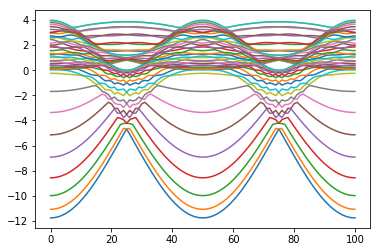

In [39]:
momenta = np.linspace(-2*np.pi, 2*np.pi, 101)
energies = []
for k_x in momenta:
    p = {'k_x': k_x}
    ham = wrapped.hamiltonian_submatrix(params=p, sparse=False)
    energies.append(np.linalg.eigh(ham)[0])
plt.plot(energies);

In [40]:
kwant.plot(lead, site_color=family_colors, site_lw=0.1, hop_lw=hopping_lw, colorbar=False);

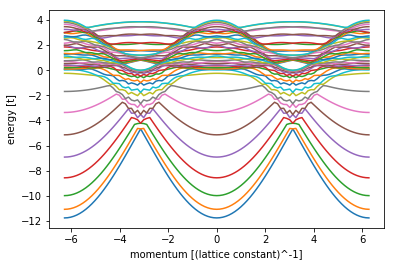

In [21]:
fsyst = lead.finalized()
bands = kwant.physics.Bands(fsyst)
momenta = np.linspace(-2*np.pi, 2*np.pi, 101)
energies = [bands(k) for k in momenta]

plt.figure()
plt.plot(momenta, energies)
plt.xlabel("momentum [(lattice constant)^-1]")
plt.ylabel("energy [t]")
plt.show()

In [22]:
syst.attach_lead(lead);

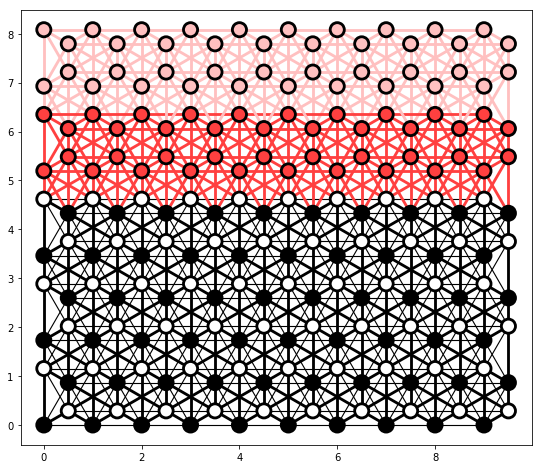

In [23]:
kwant.plot(syst, site_color=family_colors, site_lw=0.1, hop_lw=hopping_lw, colorbar=False, fig_size=(10, 8));